# Exploring Data on English Average Property Prices 

This report aims to initially carry out some exploratory analyses on the average price of specific property types over 36 months in different areas of England. It will then focus on flat prices between July 2017 to July 2018, for which a further statistical analysis will also be carried out. It is hoped that these analyses will help to inform decisions around property.

The data contains information the average property price for 4 different property types in these areas, which also have a corresponding region. Prior to analysis, the dataset will be further explored, re-organised and cleaned.

## Table of Contents

1. Section 1: Preparing the Data
      1. Loading the Data
      1. Separating the Region and Area Data
      1. Adding Regions to the Area Data
      1. Dealing with Missing Values
      
2. Section 2: Looking at the Trends in Flat and Detached Property Prices
      1. The Overall Picture of Price Trends
      1. Average Monthly Trends Across All Regions
      1. Trends Within Each Region
      1. Summary of Findings
      
3. Section 3: Price Changes in Flat Properties
      1. Merging the Data and Calculating the Difference for July 2017-2018
      1. Distributions of Flat Price Changes in Different Regions
      
3. Section 3: A Statistical Analysis of Flat Price Changes
      1. Preparing the Cross-tabulation Table
      1. Performing and Interpreting the Results of the Chi-square Test
      1. Conclusion


In [1]:
# Importing the relevant libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

## Section 1: Preparing the Data

In this section the datasets will be introduced, re-organised and modified to facilitate the analyses that will be carried out in the following sections. This will involve loading the data, dividing it into two components (region and area), adding the corresponding regions to the area data and replacement of missing values.

### Section 1.1: Loading the Data

This dataset comprises of two files of interest, one relating to the average property price and one for location codes, which will be further explained below.

The average property price file contains information on the average price of the 4 property types, spanning over a total of 36 months. The table below shows its various fields, alongside a description and the type of data that will be assigned to them.

| Name      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Date   | A date, which is the first of the month, between September 1st 2016 and August 1st 2019 (36 months in total). |string|  
|Area       | The name of an area (or region) | category | 
|Code      | The code for the area (or region) | category |
|Detached           |Average sale price of a detached property in this area in the month  | continuous |
|Semi     | Average sale price of a semi-detached property in this area in the month        | continuous |
|Terraced          | Average sale price of a terraced property in this area in the month   | continuous |
|Flat         | Average sale price of a flat property in this area in the month   | continuous |


Furthermore, the 'Code' column consists of several prefixes, which determine the classification level, where level 1 is a region (9 in total) and level 2 is a local government area that makes up part of a region. As such, each area of the country is covered twice; once at level 1 and once at level 2 (these will be separated later). The table below summarises this classification.

| Code Prefix      |      Classification             | Level | 
|:--------------|:-----------------------------|:------:|
|E12   | English Region |1| 
|E10   | County |2|  
|E09   | London Borough |2|  
|E08   | Metropolitan Borough |2|  
|E06   | English unitary authority |2| 



The corresponding dataframe for the average property prices has been loaded below.

In [2]:
# Creating a dictionary of types for the categorical data
types_dict_prices = {'Area': 'category', 'Code':'category'}

# Loading the average property prices data
prices = pd.read_csv("average-property-price.csv", dtype = types_dict_prices)
prices

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


The 'Date' column currently contains strings which need to be read in as dates. This has been done under a new column called 'Month' which has been added to the dataframe.

In [3]:
# Parsing the date data and assigning it to a new column
# As the date strings contain the day first, this has been passed as true
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True))
prices

,Date,Area,Code,Detached,Semi,Terraced,Flat,Month
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


The 'Date' string column is no longer required; this column will be dropped and the resulting dataframe is shown below.

In [4]:
# Dropping the date string column
prices = prices.drop(labels='Date', axis=1)
prices

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


We will now load the location codes data, which contains similar columns. The 'AuthorityCode' and 'RegionCode' correspond to an area and region code respectively (which are combined in the 'Code' column of the average price data). The 'AuthorityName' and 'RegionName' correspond to areas and regions respectively in the 'Area' column of the average price data.

In [5]:
# Creating a dictionary of types for the categorical data
types_dict_regions = {'AuthorityCode': 'category', 'AuthorityName':'category', 'RegionName': 'category'}

# Loading the location code data
location_codes = pd.read_csv("location-codes.csv", dtype = types_dict_regions)
location_codes

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


### Section 1.2: Separating the Region and Area Data

As shown in the previous subsection, the average price data contains 'Area' and 'Code' columns which both contain a mix of area/region names and codes. Two dataframes corresponding to each of the region and areas will be created as follows:
* The region codes have a prefix of 'E12', which will be separated into a dataframe called 'prices_region' (the region data)
* The area codes contain the remaining prefixes, namely 'E06', 'E08', 'E09' and 'E10' which will be separated into a dataframe called 'prices_area' (the area data)

The resulting dataframe containing the region data is shown below. We can see that the codes begin with 'E12' and the entries in the 'Area' column correspond to region names.

In [6]:
# Selecting data where the 'Code' begins with E12, corresponding to a region
prices_region = prices[prices['Code'].str.startswith('E12')]
prices_region

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


Similarly, the dataframe containing the area data is created below. We can see that the codes are those that do not correspond to a region, and that the entries in the 'Area' column are more specific locations when compared to the above.

In [7]:
# Selecting data where the 'Code' begins with E06, E08, E09 or E10, corresponding to an area
prices_area = prices[prices['Code'].str.startswith(('E06', 'E08', 'E09', 'E10'))]
prices_area

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


### Section 1.3: Adding Regions to the Area Data

To support analysis, we would like to add the corresponding region name for an area to the separated 'prices_area' dataframe. This is where the location code data loaded in section 1.1 will be useful, which contains separate columns for the area codes, as well as the corresponding region name.

We will perform a merge operation to match the 'Code' column of the area data with the 'AuthorityCode' column of the location codes dataframe. This will be used to effectively "add" specifically the corresponding 'RegionName' for a given 'Code' in the area data.

In [8]:
# Merging the area data with 'RegionName' from the location code, using the 'AuthorityCode' to effectively map values
merged_price_area_region = pd.merge(prices_area, location_codes[['AuthorityCode', 'RegionName']], left_on=['Code'], right_on=['AuthorityCode'], how='left')
merged_price_area_region

,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E06000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E06000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E06000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E06000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E06000001,North East
...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E10000034,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E10000034,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E10000034,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E10000034,West Midlands


As shown above, the dataframes have been merged where the 'Code' is equal to the 'AuthorityCode'. Attached to that is the corresponding 'RegionName' from the location code dataframe. The 'AuthorityCode' is duplicate data which we can now remove.

In [9]:
# Removing the 'AuthorityCode' column
merged_price_area_region = merged_price_area_region.drop('AuthorityCode', 1)
merged_price_area_region

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


We can perform a check on a random sample of rows to ensure that a region has correctly been assigned for a given area. This is shown below; a visual check confirms that region names have been correctly added. For example, looking at the first row, we know that Hounslow is an area in London.

In [10]:
# Take a random sample of 10 rows from the dataframe, with a fixed seed to prevent new sample selection on re-run
merged_price_area_region.sample(n=10, random_state=1)

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
3909,Hounslow,E09000018,7.600113e+05,545120.2810,465285.5203,320128.01470,2018-06-01,London
4387,Waltham Forest,E09000031,7.619489e+05,647364.0829,475035.4624,348554.77100,2019-04-01,London
3349,Barnet,E09000003,1.216054e+06,718325.7894,541710.5449,403304.33610,2016-10-01,London
987,Bournemouth,E06000028,4.089554e+05,264901.4366,218935.6956,175091.17960,2017-12-01,South West
206,Halton,E06000006,2.363168e+05,140058.4158,103155.5126,77893.41438,2018-11-01,North West
4848,Hertfordshire,E10000015,8.090373e+05,472449.6225,352093.2304,256816.06770,2018-09-01,East of England
1355,Reading,E06000038,6.054174e+05,375753.0565,298409.3274,222446.03160,2018-08-01,South East
1078,Swindon,E06000030,3.690754e+05,234706.2998,186090.3058,137847.87620,2019-07-01,South West
4018,Kingston upon Thames,E09000021,1.009415e+06,665158.6585,490732.8712,371306.99160,2018-07-01,London
4766,Gloucestershire,E10000013,3.994083e+05,250196.0552,206975.4368,163922.67130,2017-11-01,South West


Furthermore, a check can be performed to ensure that a region has been added to each area, i.e. there are no missing values for either of the 'Area', 'Code' or 'RegionName'. We can see the summary of any null (missing) values below. 

In [11]:
# View the non-null counts within each column
merged_price_area_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5435
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Area        5436 non-null   category      
 1   Code        5436 non-null   object        
 2   Detached    5400 non-null   float64       
 3   Semi        5400 non-null   float64       
 4   Terraced    5416 non-null   float64       
 5   Flat        5436 non-null   float64       
 6   Month       5436 non-null   datetime64[ns]
 7   RegionName  5436 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(4), object(1)
memory usage: 318.9+ KB


There do not appear to be any missing region names, as there are 5436 rows, all of which are non-null. Additionally, there are no missing values in either 'Area' or 'Code' which may have resulted in issues when merging the data.

However, we can see that there are null values in some of the other categories, which will be explored in the following subsection.

### Section 1.4: Dealing with Missing Values

As shown in the previous subsection, there are missing values in the area data. We will further explore the specific attributes which contain the missing data and implement a strategy to deal with them.

The identified columns containing the missing data are 'Detached' (36 missing values), 'Semi' (36 missing values) and 'Terraced' (20 missing values). These are shown below.

In [12]:
# Select the data where 'Detached', 'Semi' and 'Terraced' contain null values
merged_price_area_region.loc[(merged_price_area_region.Detached.isnull()) | (merged_price_area_region.Semi.isnull()) | (merged_price_area_region.Terraced.isnull())]

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


All of the missing data are in the 'London' region, specifically in the area 'City of London'. It is not apparent why this could be the case, perhaps due to an issue with data collection. Nevertheless, the missing data are likely to affect analysis if used in trends and need to be dealt with appropriately.

There are several strategies that could be employed, including removing/ignoring the data, replacing it with a column feature such as a mean (average) or median (the middle value). In order to select a strategy, we should seek to further understand the data.

Removing the data may not be an ideal option, as this would mean that the rest of the information contained within these rows such as 'Flat' price would be lost (which will be useful for later analysis). Replacing the values with zero would introduce outliers, as we would not expect a property price to be free, regardless of the type. 

Therefore, we will look at techniques to replace the missing values. To select an appropriate value to replace them, we will view the distributions of the relevant attributes. Below are boxplots to show the distribution of values for each of the 'Detached', 'Semi' and 'Terraced' in the area data.

Boxplots highlight the median (middle line in the 'box'; the value that separates 50% of the values on either side), the lower quartile (bottom of the 'box'; below which the smallest 25% of values reside), and upper quartile (above which the largest 25% of values reside). They also show the maximum and minimum values (excluding outliers when applicable; the two horizontal lines outside the box) for a variable. The middle 50% of data (the interquartile range, in between the upper and lower quartiles) are present in the 'box' region. Outliers (data points that are more than 1.5 interquartile ranges below the first quartile and/or above the third quartile) are indicated by circles outside the range of variables.

Text(0, 0.5, 'Price')

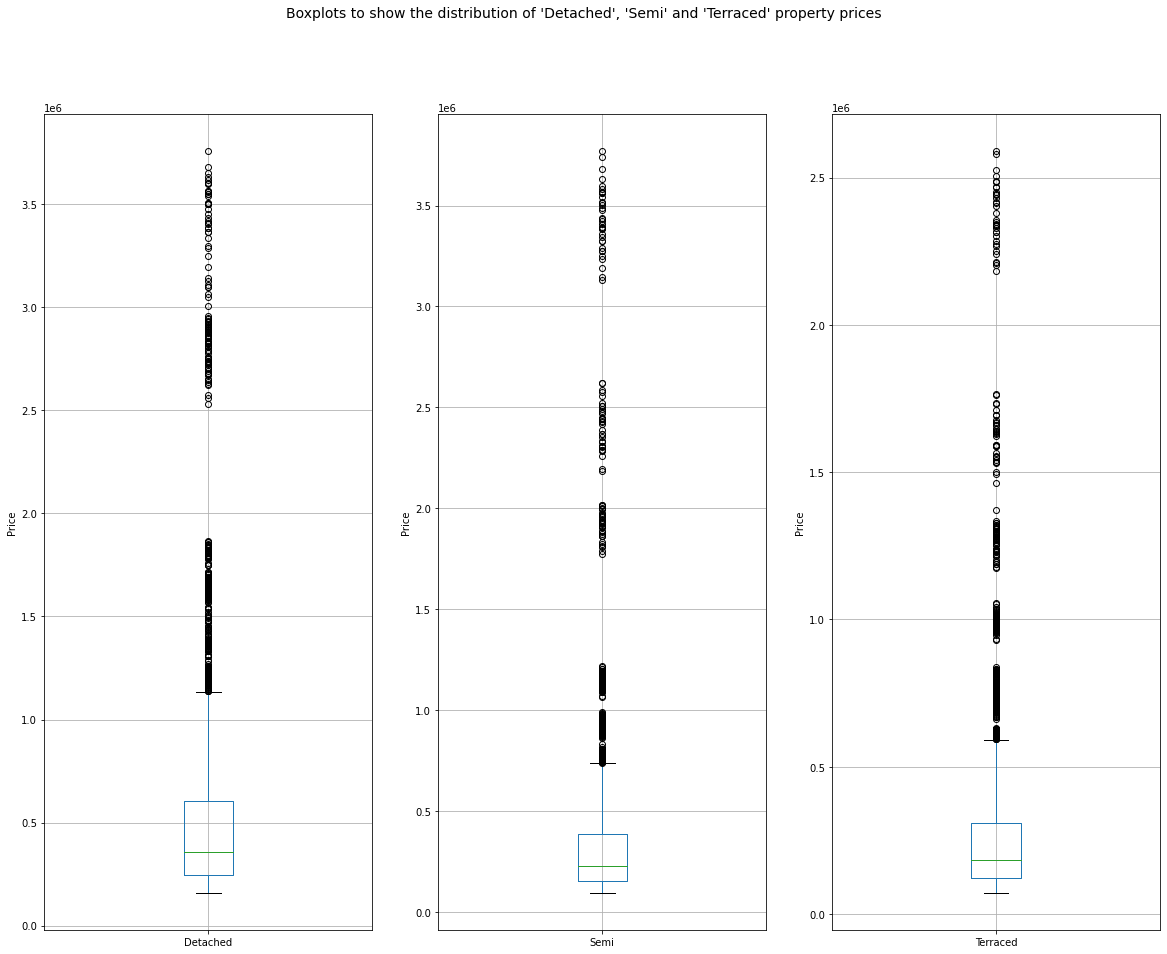

In [13]:
fig, (a1,a2,a3) = plt.subplots(1,3, figsize=(20,15))

fig.suptitle("Boxplots to show the distribution of 'Detached', 'Semi' and 'Terraced' property prices", fontsize=14)

merged_price_area_region.boxplot(column='Detached', ax=a1)
a1.set_ylabel("Price")
merged_price_area_region.boxplot(column='Semi', ax=a2)
a2.set_ylabel("Price")
merged_price_area_region.boxplot(column='Terraced', ax=a3)
a3.set_ylabel("Price")

It is evident from the above that data for all three property types is skewed as there are large numbers of data points in each distribution that are outliers. Therefore, using the mean of each attribute to fill in the missing values is not appropriate, as it will be significantly impacted by the outlier data points. In addition, the data does not appear to be symmetric, which further demonstrates the non-suitability of a mean value to fill in missing data.

An alternative option for replacing the missing values in skewed data is using the median value. In cases of skewed data, the median is a better measure of central tendency as it represents the "middle value" of an attribute. Therefore, we will replace the missing values with the corresponding median of the attributes.

In [14]:
# Replacing the missing values with the corresponding median of the attribute
merged_price_area_region['Detached'].fillna(merged_price_area_region['Detached'].median(), inplace=True)
merged_price_area_region['Semi'].fillna(merged_price_area_region['Semi'].median(), inplace=True)
merged_price_area_region['Terraced'].fillna(merged_price_area_region['Terraced'].median(), inplace=True)

# Selecting rows of data which previously contained the missing values
merged_price_area_region.iloc[3276:3312, :]

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
3276,City of London,E09000001,359586.29175,225916.20955,1.189234e+06,777891.9778,2016-09-01,London
3277,City of London,E09000001,359586.29175,225916.20955,1.195010e+06,790055.2118,2016-10-01,London
3278,City of London,E09000001,359586.29175,225916.20955,1.229508e+06,815992.8991,2016-11-01,London
3279,City of London,E09000001,359586.29175,225916.20955,1.217013e+06,809149.8515,2016-12-01,London
3280,City of London,E09000001,359586.29175,225916.20955,1.227435e+06,817654.0898,2017-01-01,London
3281,City of London,E09000001,359586.29175,225916.20955,1.189660e+06,818093.5200,2017-02-01,London
3282,City of London,E09000001,359586.29175,225916.20955,1.176573e+06,851416.0699,2017-03-01,London
3283,City of London,E09000001,359586.29175,225916.20955,1.238739e+06,903551.8492,2017-04-01,London
3284,City of London,E09000001,359586.29175,225916.20955,1.277796e+06,937307.4240,2017-05-01,London
3285,City of London,E09000001,359586.29175,225916.20955,1.174213e+06,928316.5022,2017-06-01,London


Above we have selected the rows that initially contained the missing data. These have now been replaced by the corresponding medians of the attributes.

In addition, we perform a check for any missing values in the region data. As can be seen below, there are no null values; all the non-null counts are equal and earlier we saw that there are 324 rows in the dataframe. No further action is required for this subset of data.

In [15]:
# View the non-null counts for the region data
prices_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 5436 to 5759
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Area      324 non-null    category      
 1   Code      324 non-null    category      
 2   Detached  324 non-null    float64       
 3   Semi      324 non-null    float64       
 4   Terraced  324 non-null    float64       
 5   Flat      324 non-null    float64       
 6   Month     324 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(4)
memory usage: 23.0 KB


## Section 2: Looking at the Trends in Flat and Detached Property Prices

In this section we will be further exploring the region data. Specifically, we will look at the trends of the prices in flat and detached properties in the 9 regions over the 36 months. Prior to generating plots, we will set the index (first column) of the dataframe to 'Month' to facilitate the process.

In [16]:
# Setting the index of region data to month
prices_region = prices_region.set_index(keys='Month')
prices_region

,Area,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...
2019-04-01,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
2019-05-01,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
2019-06-01,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830


### Section 2.1: The Overall Picture of Price Trends

To look at the bigger picture of the trends in flat and detached property prices in the 9 regions over the 36 months, the time series for each property type has been plotted below. Colours have been assigned to each region to aid distinction, as well as sharing of the y-axis to facilitate comparisons between the property types.

Text(0, 0.5, 'Detached')

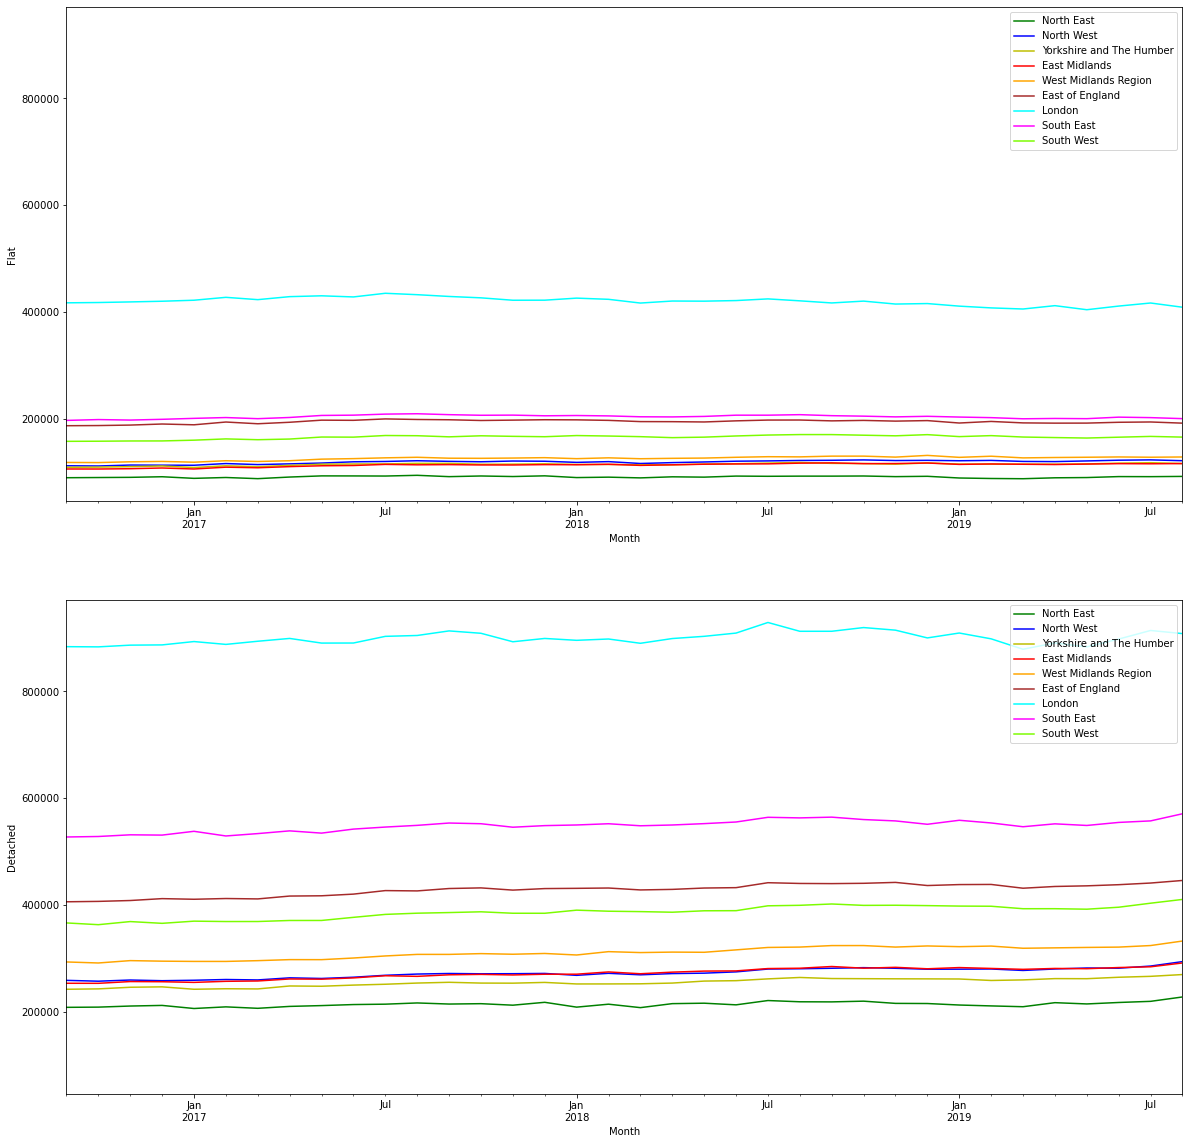

In [17]:
# Grouping the data by area, and creating groups for the different regions
gbyRegion = prices_region.groupby(by = 'Area', dropna=False)

north_east = gbyRegion.get_group('North East')
north_west = gbyRegion.get_group('North West')
yorkshire_humber = gbyRegion.get_group('Yorkshire and The Humber')
east_midlands = gbyRegion.get_group('East Midlands')
west_midlands = gbyRegion.get_group('West Midlands Region')
east_england = gbyRegion.get_group('East of England')
london = gbyRegion.get_group('London')
south_east = gbyRegion.get_group('South East')
south_west = gbyRegion.get_group('South West')


# Creating the sublpots for 'Flat' and 'Detached' property prices
fig, (a1,a2) = plt.subplots(2, 1, figsize=(20,20), sharey=True)

north_east.plot(kind='line', y='Flat', label='North East', ax=a1, color='g')
north_west.plot(kind='line', y='Flat', label='North West', ax=a1, color='b')
yorkshire_humber.plot(kind='line', y='Flat', label='Yorkshire and The Humber', ax=a1, color='y')
east_midlands.plot(kind='line', y='Flat', label='East Midlands', ax=a1, color='r')
west_midlands.plot(kind='line', y='Flat', label='West Midlands Region', ax=a1, color='orange')
east_england.plot(kind='line', y='Flat', label='East of England', ax=a1, color='brown')
london.plot(kind='line', y='Flat', label='London', ax=a1, color='cyan')
south_east.plot(kind='line', y='Flat', label='South East', ax=a1, color='magenta')
south_west.plot(kind='line', y='Flat', label='South West', ax=a1, color='lawngreen')

a1.set_ylabel("Flat")

north_east.plot(kind='line', y='Detached', label='North East', ax=a2, color='g')
north_west.plot(kind='line', y='Detached', label='North West', ax=a2, color='b')
yorkshire_humber.plot(kind='line', y='Detached', label='Yorkshire and The Humber', ax=a2, color='y')
east_midlands.plot(kind='line', y='Detached', label='East Midlands', ax=a2, color='r')
west_midlands.plot(kind='line', y='Detached', label='West Midlands Region', ax=a2, color='orange')
east_england.plot(kind='line', y='Detached', label='East of England', ax=a2, color='brown')
london.plot(kind='line', y='Detached', label='London', ax=a2, color='cyan')
south_east.plot(kind='line', y='Detached', label='South East', ax=a2, color='magenta')
south_west.plot(kind='line', y='Detached', label='South West', ax=a2, color='lawngreen')

a2.set_ylabel("Detached")

Looking at the plots above, there are several trends that can be noticed:
* It is clear that, for a given region, the price of detached properties is always higher than that of a flat which is expected.
* There are greater differences in the prices of detached properties between regions, as the lines are generally more spaced out when compared to that of flats.
* London has significantly greater prices for both flat and detached properties, when compared to any other region.
* The flat and detached property prices appear to be the greatest for (in descending order) these areas of England: London, South East, East and the South West
* For both property types, the prices in the North West and East Midlands appear to be the most similar.
* The cheapest flat and detached properties are available in the North East of England.
* At the end of the 36 month period, the detached property prices generally show a price increase, whereas there is no such visible trend in the flat prices.

### Section 2.2: Average Monthly Trends Across All Regions

Before looking at the specific trends over the 36 months within each region in more detail, we will first look at the average trend across all regions. This average is based on prices in all regions, for a given month. Although we will be able to see average prices per month across all regions, the main purpose is to visualise the overall trend of the change in flat and detached prices.

Text(0, 0.5, 'Detached')

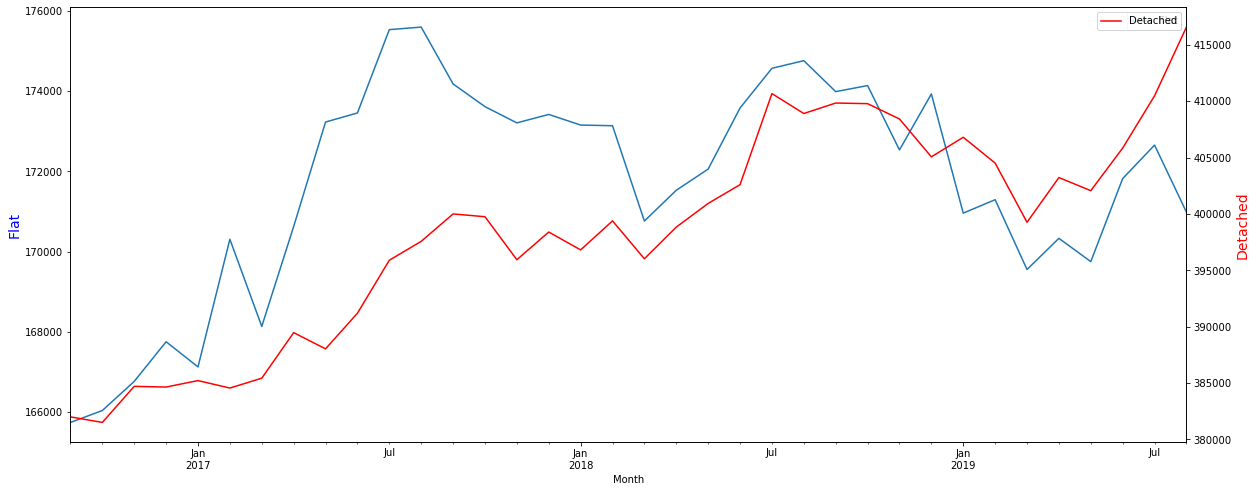

In [18]:
# Grouping the data by Month, then obtaining the average for all regions
gbyRegionAvg = prices_region.groupby(by = 'Month', dropna=False).mean()
fig, a1 = plt.subplots(1,1, figsize=(20,8))


# Plotting the averages per month for each property type
fig.subplots_adjust(hspace=0.35)

gbyRegionAvg.plot(kind='line', y='Flat', ax=a1)
a1x = a1.twinx()
gbyRegionAvg.plot(kind='line', y='Detached', color='r', ax=a1x)
a1.set_ylabel('Flat', fontsize=14, color='b')
a1x.set_ylabel('Detached', fontsize=14, color='r')

From the above we can make a few observations. Note that these are only general trends, and may not apply to every region.
We can see that the detached property prices reach an all time high at the end of the 36 month period. Whereas, although the flat prices also show a general increase, there is an all time high (for the period) around July 2017 followed by smaller peaks in the following years. In terms of the prices, these are likely to be skewed by London (which are considerably higher, as shown in the previous section). We can also see see price drops at the start of the year for both flat and detached properties, followed by peaks around the third quarter of the year (around July-September). We could expect to see similar trends amongst the individual regions, which will be explored in the next subsection.

### Section 2.3: Trends Within Each Region

We will now look further into the trends within each region. Below are plots for each of the 9 regions, with both of the flat and detached properties on a single plot to aid comparison. By plotting on the same graph, we can compare the trends, per region, of flat and detached properties. Comments will be made on the changes within a region with respect to the time of year.

Text(0, 0.5, 'Detached')

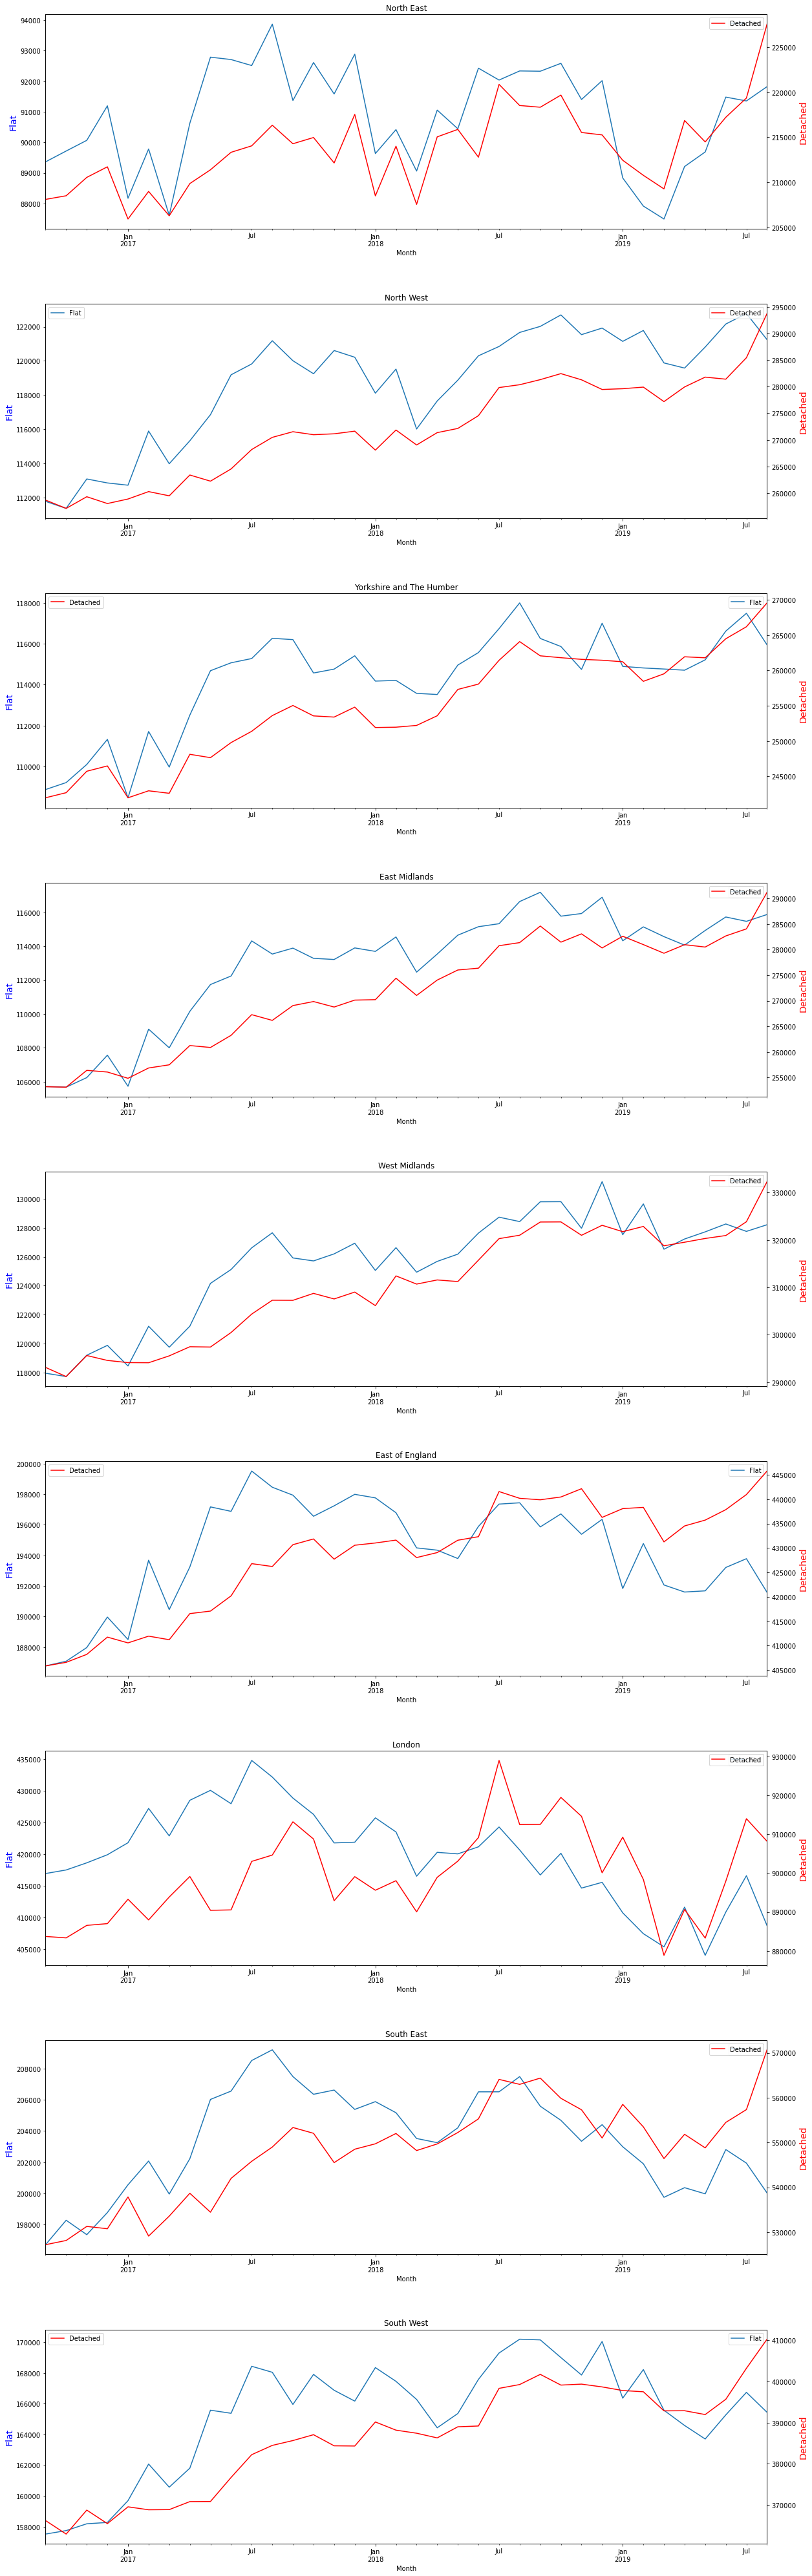

In [19]:
fig, (a1,a2,a3,a4,a5,a6,a7,a8,a9) = plt.subplots(9,1, figsize=(20,72))

fig.subplots_adjust(hspace=0.35)

north_east.plot(kind='line', y='Flat', ax=a1)
a1.set_title("North East")
a1x = a1.twinx()
north_east.plot(kind='line', y='Detached', color='r', ax=a1x)
a1.set_ylabel('Flat', fontsize=14, color='b')
a1x.set_ylabel('Detached', fontsize=14, color='r')

north_west.plot(kind='line', y='Flat', ax=a2)
a2.set_title("North West")
a2x = a2.twinx()
north_west.plot(kind='line', y='Detached', color='r', ax=a2x)
a2.set_ylabel('Flat', fontsize=14, color='b')
a2x.set_ylabel('Detached', fontsize=14, color='r')

yorkshire_humber.plot(kind='line', y='Flat', ax=a3)
a3.set_title("Yorkshire and The Humber")
a3x = a3.twinx()
yorkshire_humber.plot(kind='line', y='Detached', color='r', ax=a3x)
a3.set_ylabel('Flat', fontsize=14, color='b')
a3x.set_ylabel('Detached', fontsize=14, color='r')

east_midlands.plot(kind='line', y='Flat', ax=a4)
a4.set_title("East Midlands")
a4x = a4.twinx()
east_midlands.plot(kind='line', y='Detached', color='r', ax=a4x)
a4.set_ylabel('Flat', fontsize=14, color='b')
a4x.set_ylabel('Detached', fontsize=14, color='r')

west_midlands.plot(kind='line', y='Flat', ax=a5)
a5.set_title("West Midlands")
a5x = a5.twinx()
west_midlands.plot(kind='line', y='Detached', color='r', ax=a5x)
a5.set_ylabel('Flat', fontsize=14, color='b')
a5x.set_ylabel('Detached', fontsize=14, color='r')

east_england.plot(kind='line', y='Flat', ax=a6)
a6.set_title("East of England")
a6x = a6.twinx()
east_england.plot(kind='line', y='Detached', color='r', ax=a6x)
a6.set_ylabel('Flat', fontsize=14, color='b')
a6x.set_ylabel('Detached', fontsize=14, color='r')

london.plot(kind='line', y='Flat', ax=a7)
a7.set_title("London")
a7x = a7.twinx()
london.plot(kind='line', y='Detached', color='r', ax=a7x)
a7.set_ylabel('Flat', fontsize=14, color='b')
a7x.set_ylabel('Detached', fontsize=14, color='r')

south_east.plot(kind='line', y='Flat', ax=a8)
a8.set_title("South East")
a8x = a8.twinx()
south_east.plot(kind='line', y='Detached', color='r', ax=a8x)
a8.set_ylabel('Flat', fontsize=14, color='b')
a8x.set_ylabel('Detached', fontsize=14, color='r')

south_west.plot(kind='line', y='Flat', ax=a9)
a9.set_title("South West")
a9x = a9.twinx()
south_west.plot(kind='line', y='Detached', color='r', ax=a9x)
a9.set_ylabel('Flat', fontsize=14, color='b')
a9x.set_ylabel('Detached', fontsize=14, color='r')

From the above plots, we can make the following observations:
* North East: prices have generally increased over the 36 month period. They tend to drop at the start of each year (but the drop in early 2018 appears smaller than the others), and peak in the third quarter. The price trends for both flat and detached property in this region appear more volatile when compared to others. The shapes of trends for both flat and detached properties are similar.
* North West: a general price increase over the period. Flat prices tend to drop at the start of the year, whilst detached show a gradual increase with relatively smaller dips at the start of the year. The relative increases in price for flat properties appear to be consistently greater than those of detached properties. Both show peaks in the third quarter.
* Yorkshire and The Humber: a general increase over the 36 months. Flat prices drop at the start of the year, and peak around July. There is a similar pattern for detached properties.
* East Midlands: general price increase over the 36 months. Both flat and detached property prices drop at the start of the year and peak in the third quarter. The dips for the detached properties appear relatively smaller when compared to flat. The shape of the trends for both types are similar.
* West Midlands: general price increase over the 36 months. Flat prices drop at the start of the year, detached show a similar drop but this is relatively smaller. Flat and detached prices peak towards the end of the year.
* East of England: prices for both types of property have generally increased. However, whilst the detached properties hit an all time high towards the end of the period, the flat peaked around July 2017 and then dropped significantly, almost to the same point as the price at the start of the period. Considering the years from 2017-2018 and 2018-2019, both show peaks in the third quarter, following which the flat prices drop (whilst the detached reach an all time high for the period).
* London: flat prices have dropped, whereas detached have shown an increase. London flat prices show an overall peak for the period in July 2017, followed by a general drop. For each year, both flat and detached prices peak  in the third quarter and drop at the start of the year. There is a relatively significant dip for both types of property in the first quarter of 2019. The price trends for detached properties in this region are also relatively quite volatile, but not as much as those in the North East.
* South East: shows a similar trend to the East of England - whilst both prices have generally increased, the detached reach an all time high for the period at the end of the year. Whereas, the flat prices show a high peak in the third quarter of 2017, followed by a general price drop (which mainly occur at the start of the year, resulting in smaller peaks in the following third quarter). Once again, detached properties show price drops at the start of the year and peak in the third quarter. The shape of the trends for both property types a similar, with the detached lagging slightly behind.
* South West: a general price increase, but whilst detached properties reach a high at the end of the period, the flat prices drop. Aside from this, price drops occur at the start of the year and tend to peak in the third quarter. The drops and peaks for flat prices are larger than those for the detached.

### Section 2.4: Summary of Findings

Below is a summary of the findings from this section:

* The region with the most expensive flat and detached properties is London, and the cheapest are in the North East
* Most regions have experienced price increases over the 36 month period for both flat and detached properties.
* There is a recurring theme of prices dropping at the start of a year, followed by a yearly peak in the third quarter.
* The regions North East and London appear to have had the most volatile price changes when compared to others. 
* London flat prices are the only group that have shown an overall price drop throughout the period.



## Section 3: Price Changes in Flat Properties

In this section we will look further at the price changes in flat properties using the area data. Specifically, the price change of flats between July 2017 and 2018 will be determined. First we will select the relevant data, then calculate the price difference for each area. We will then visualise this data and comment on any observed patterns.

### Section 3.1: Merging the Data and Calculating the Difference for July 2017-2018

The data relating to the flat price in each area on the 1st July 2017 and 1st July 2018 have been selected, including the area, region name, flat price and month column (shown below).

The data for areas relating to the month of 2017-07-01 have been selected in a separate dataframe:

In [20]:
# Selecting the data where the month is July 2017
july_17 = merged_price_area_region.loc[prices_area['Month'] == '2017-07-01']
july_17 = july_17.loc[:, ['Area', 'RegionName', 'Flat', 'Month']]
july_17

,Area,RegionName,Flat,Month
10,Hartlepool,North East,65007.84170,2017-07-01
46,Middlesbrough,North East,69163.06963,2017-07-01
82,Redcar and Cleveland,North East,65507.80990,2017-07-01
118,Stockton-on-Tees,North East,83599.32806,2017-07-01
154,Darlington,North East,87041.37973,2017-07-01
...,...,...,...,...
5266,Suffolk,East of England,140278.18370,2017-07-01
5302,Surrey,South East,270116.52610,2017-07-01
5338,Warwickshire,West Midlands,165676.94800,2017-07-01
5374,West Sussex,South East,193547.45490,2017-07-01


A similar process was carried out for the month of 2018-07-01. The 'RegionName' column has not been selected to avoid duplication during the merge.

In [21]:
# Selecting the data where the month is July 2018
july_18 = merged_price_area_region.loc[prices_area['Month'] == '2018-07-01']
july_18 = july_18.loc[:, ['Area', 'Flat', 'Month']]
july_18

,Area,Flat,Month
22,Hartlepool,61116.82158,2018-07-01
58,Middlesbrough,69313.90788,2018-07-01
94,Redcar and Cleveland,64802.79724,2018-07-01
130,Stockton-on-Tees,83654.55272,2018-07-01
166,Darlington,83679.31818,2018-07-01
...,...,...,...
5278,Suffolk,142488.46480,2018-07-01
5314,Surrey,267144.69100,2018-07-01
5350,Warwickshire,167470.71860,2018-07-01
5386,West Sussex,191835.79530,2018-07-01


We then merge the two dataframes on the 'Area' column, drop the month columns and rename the flat price columns to 'July_17' and 'July_18' respectively.

In [22]:
# Merging the two dataframes, using Area as the common attribute
merged_july_17_18 = july_17.merge(july_18, how='inner', on = ['Area']).drop(labels=['Month_x', 'Month_y'], axis=1)
merged_july_17_18 = merged_july_17_18.rename(columns={'Flat_x': 'July_17', 'Flat_y': 'July_18'})
merged_july_17_18

,Area,RegionName,July_17,July_18
0,Hartlepool,North East,65007.84170,61116.82158
1,Middlesbrough,North East,69163.06963,69313.90788
2,Redcar and Cleveland,North East,65507.80990,64802.79724
3,Stockton-on-Tees,North East,83599.32806,83654.55272
4,Darlington,North East,87041.37973,83679.31818
...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480
147,Surrey,South East,270116.52610,267144.69100
148,Warwickshire,West Midlands,165676.94800,167470.71860
149,West Sussex,South East,193547.45490,191835.79530


We can now calculate the difference between them by taking the flat price in July 2018 minus the flat price in July 2017. This has been added for each area to the dataframe in a new column called 'Price_Change'.

In [23]:
# Define a function to calculate the difference in flat prices
def calculateDifference(row):
    return row['July_18'] - row['July_17']

# Apply the above function and assign the resulting value to each row under a new column
price_change = merged_july_17_18.assign(Price_Change = merged_july_17_18.apply(calculateDifference, axis=1))
price_change

,Area,RegionName,July_17,July_18,Price_Change
0,Hartlepool,North East,65007.84170,61116.82158,-3891.02012
1,Middlesbrough,North East,69163.06963,69313.90788,150.83825
2,Redcar and Cleveland,North East,65507.80990,64802.79724,-705.01266
3,Stockton-on-Tees,North East,83599.32806,83654.55272,55.22466
4,Darlington,North East,87041.37973,83679.31818,-3362.06155
...,...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480,2210.28110
147,Surrey,South East,270116.52610,267144.69100,-2971.83510
148,Warwickshire,West Midlands,165676.94800,167470.71860,1793.77060
149,West Sussex,South East,193547.45490,191835.79530,-1711.65960


### Section 3.2: Distributions of Flat Price Changes in Different Regions

Before looking at changes in individual areas, we will look at the distributions of flat price changes within each region. This will allow us to gain an overview of the data. Boxplots for each region will help us to visualise these changes, shown below.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'East Midlands'),
  Text(2, 0, 'East of England'),
  Text(3, 0, 'London'),
  Text(4, 0, 'North East'),
  Text(5, 0, 'North West'),
  Text(6, 0, 'South East'),
  Text(7, 0, 'South West'),
  Text(8, 0, 'West Midlands'),
  Text(9, 0, 'Yorkshire and The Humber')])

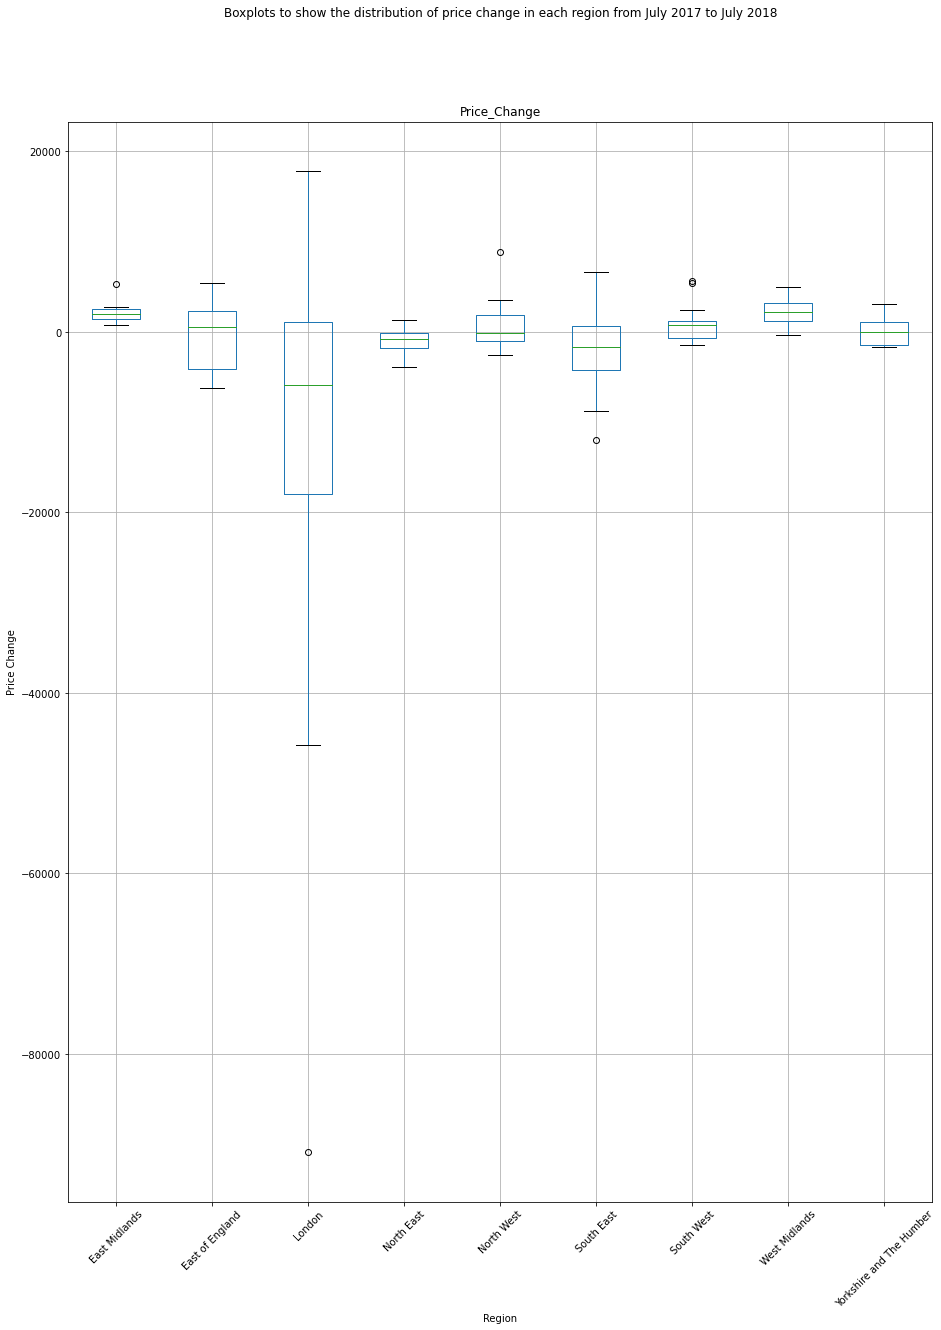

In [24]:
# Generating boxplots to show the distribution of flat price change in each region
fig, a1 = plt.subplots(1,1, figsize=(15,20))

price_change.boxplot(column='Price_Change', by='RegionName', ax=a1)
fig.suptitle("Boxplots to show the distribution of price change in each region from July 2017 to July 2018")
a1.set_xlabel("Region")
a1.set_ylabel("Price Change")
plt.xticks(rotation=45)

From the above boxplots we can note the following:
* The London region demonstrates the largest variation (which is significant compared to the other regions) in its distribution, as indicated by the minimum, maximum values and box region. It includes the biggest price increase and decrease of all regions. There is an interesting outlier at approximately -93,000, which indicates that one area had a highly significant reduction in the flat price over the year. We can explore this further when looking at individual areas (later in this section).
* There appear to be no areas within the East Midlands region that have experienced a decrease in flat price. The values within the region are the least spread, as indicated by the small range. This suggests that the inter-area variation within this region is the least different, i.e. the areas have the most similar price changes over the year.
* The following regions have most of their distributions in the negative range, implying a general price reduction in the areas: East of England, London, North East and South East.
* The following regions show generally positive (increase) price changes amongst the areas, East Midlands (mentioned earlier), South West and West Midlands.
* The vast majority of areas in the West Midlands (possibly all except 1) all show an increase in flat prices.
* The medians of North West/Yorkshire and The Humber appear to be very close to zero, which implies that of the area(s) with a non-zero/close to 0 price change, 50% of the areas have experienced a price decrease, and the other 50% a decrease.

### Section 3.3: Flat Price Changes for Each Area Within a Region

We would now like to visualise the price changes for each area within each of the regions explored above. We can generate bar graphs which show the magnitude and direction for each of the price changes for the respective areas within a region. Within each region, the price change has been sorted in ascending order (lowest to highest) for ease of comparison.

Bar graphs to show the distribution of price change for each area (by region) from July 2017 to July 2018


Text(0, 0.5, 'Price')

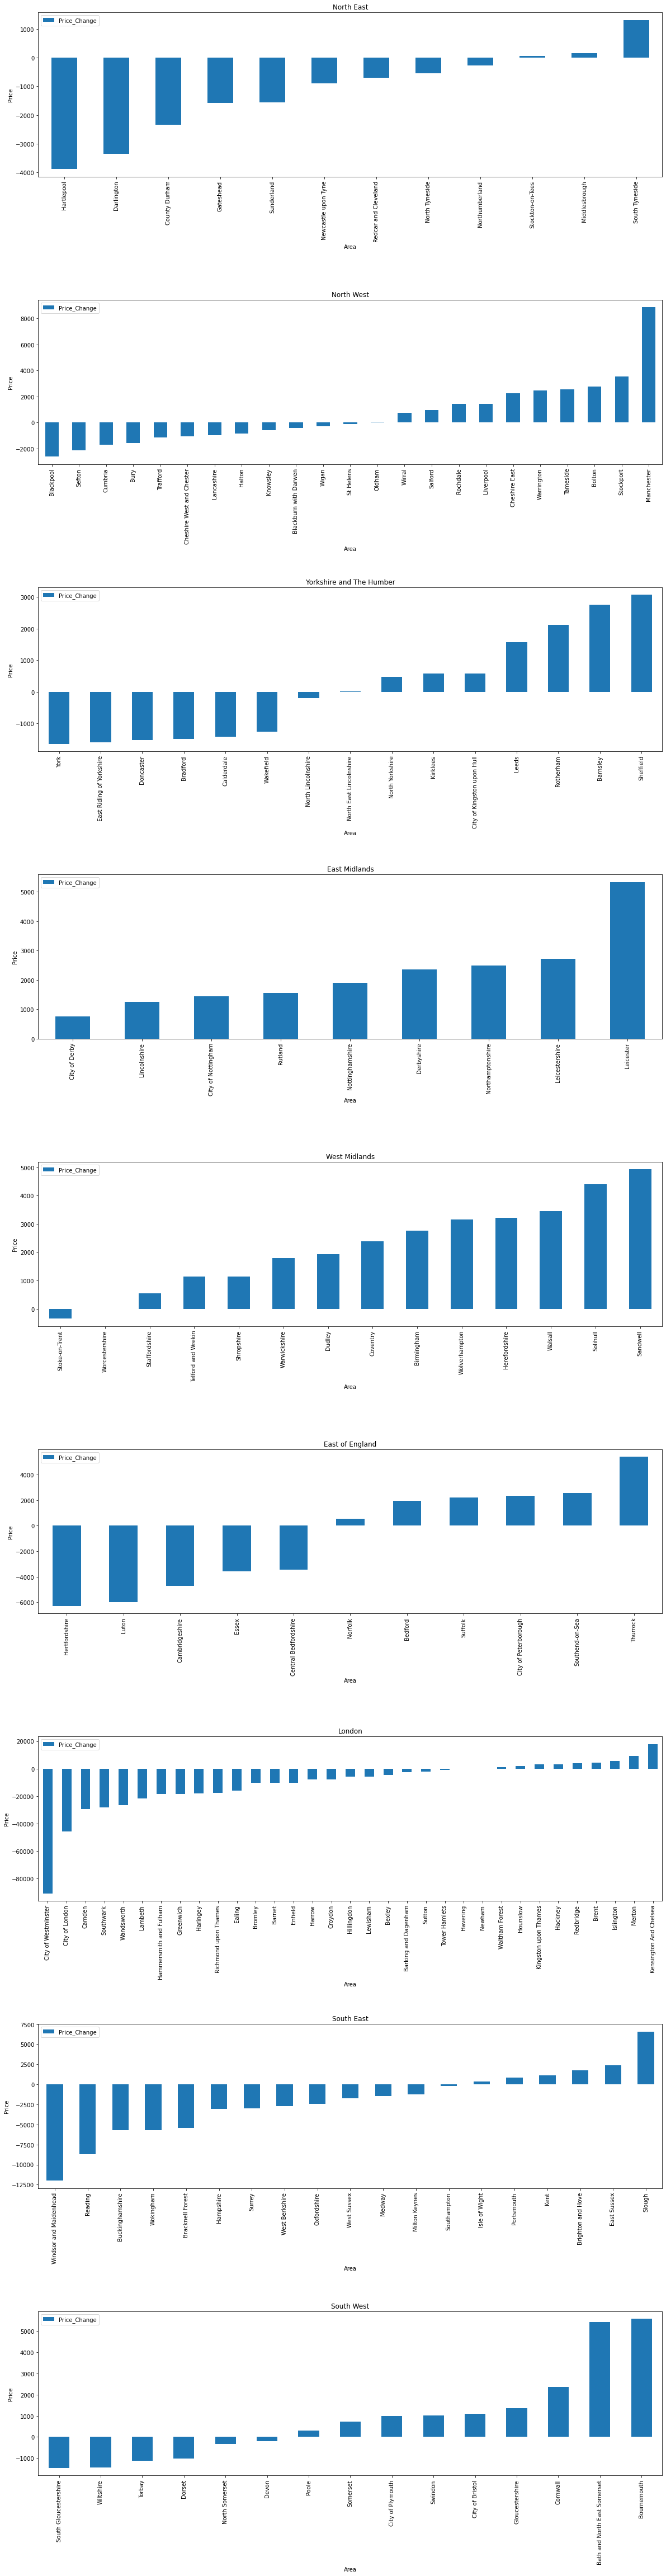

In [25]:
# Grouping the area data by region
gbyRegion = price_change.groupby(by = 'RegionName', dropna=False)


# Getting each group and sorting in ascending order
north_east = gbyRegion.get_group('North East').sort_values(by='Price_Change', ascending=True)
north_west = gbyRegion.get_group('North West').sort_values(by='Price_Change', ascending=True)
yorkshire_humber = gbyRegion.get_group('Yorkshire and The Humber').sort_values(by='Price_Change', ascending=True)
east_midlands = gbyRegion.get_group('East Midlands').sort_values(by='Price_Change', ascending=True)
west_midlands = gbyRegion.get_group('West Midlands').sort_values(by='Price_Change', ascending=True)
east_england = gbyRegion.get_group('East of England').sort_values(by='Price_Change', ascending=True)
london = gbyRegion.get_group('London').sort_values(by='Price_Change', ascending=True)
south_east = gbyRegion.get_group('South East').sort_values(by='Price_Change', ascending=True)
south_west = gbyRegion.get_group('South West').sort_values(by='Price_Change', ascending=True)

# Plotting the bar graphs to show price changes for each area within a region
fig, (a1,a2,a3,a4,a5,a6,a7,a8,a9) = plt.subplots(9,1, figsize=(20,81))

print("Bar graphs to show the distribution of price change for each area (by region) from July 2017 to July 2018")

fig.subplots_adjust(hspace=0.75)

north_east.plot(kind='bar', x='Area', y='Price_Change', ax=a1)
a1.set_title("North East")
a1.set_ylabel("Price")

north_west.plot(kind='bar', x='Area', y='Price_Change', ax=a2)
a2.set_title("North West")
a2.set_ylabel("Price")

yorkshire_humber.plot(kind='bar', x='Area', y='Price_Change', ax=a3)
a3.set_title("Yorkshire and The Humber")
a3.set_ylabel("Price")

east_midlands.plot(kind='bar', x='Area', y='Price_Change', ax=a4)
a4.set_title("East Midlands")
a4.set_ylabel("Price")

west_midlands.plot(kind='bar', x='Area', y='Price_Change', ax=a5)
a5.set_title("West Midlands")
a5.set_ylabel("Price")

east_england.plot(kind='bar', x='Area', y='Price_Change', ax=a6)
a6.set_title("East of England")
a6.set_ylabel("Price")

london.plot(kind='bar', x='Area', y='Price_Change', ax=a7)
a7.set_title("London")
a7.set_ylabel("Price")

south_east.plot(kind='bar', x='Area', y='Price_Change', ax=a8)
a8.set_title("South East")
a8.set_ylabel("Price")

south_west.plot(kind='bar', x='Area', y='Price_Change', ax=a9)
a9.set_title("South West")
a9.set_ylabel("Price")

From the area breakdown provided by the bar graphs above, we can see that our findings are in accordance with those noted earlier:
* North East: all but three areas (Middlesborough, Stockton-on-Tees and South Tyneside) have had a general price reduction. Hartlepool and Darlington show the greatest reductions. 
* North West: Oldham and St Helen's have a price change very close to 0, ten areas have a price increase and the remaining eleven show a price decrease. A substantial increase can be seen for Manchester, which corresponds to the outlier in the respective boxplot.
* Yorkshire and The Humber: North East Lincolnshire has a price change very close to zero, and of the 14 remaining areas. 7 show price increases and 7 show decreases which is in accordance with the findings of the boxplot.
* East Midlands: as expected, all areas have shown a price increase. Interestingly, this is the only area which shows such a trend. Leicester shows a noticably higher increase in flat prices.
* West Midlands: all areas except Stoke-On-Trent (price decrease) and Worcestershire (virtually no change) demonstrate price increases.
* East of England: there is an almost even split (6:5) of areas showing general price increases and decreases respectively
* London: generally there are price reductions amongst all areas (with the exception of a few). Of the areas with a price increase, Kingston and Chelsea shows a relatively large increase. Particularly notable decreases in the City of London and City of Westminster (which is the outlier noted on the boxplot), which are also the largest price reductions amongst all regions. Havering and Newham have relatively insignificant price changes, but note the much larger scale in this region.
* South East: general price reductions amongst all areas, in particular Reading, Windsor and Maidenhead show the greatest deductions. Of the areas showing a price increase, Slough is substantially greater.
* South West: prices generally increase in the areas, with the exception of a few relatively small price decreases. Bournemouth, Bath and North East Somerset demonstrate the greatest price increases.

## Section 4: A Statistical Analysis of Flat Price Changes

The aim of this section is to determine whether or not there is evidence to suggest that each region has experienced similar flat price changes between July 2017 and July 2018 using the chi-square test.

### Section 4.1: Preparing the Cross-tabulation Table

Prior to performing the chi-square test, we need to create a contingency (cross-tabulation) table, which will look at each region and how many areas within them have a price decrease or increase. We will first assign a new column called 'Change' to the merged price change dataframe for July 2017 to July 2018 created in section 3. This will either apply a 'Decrease' if the price change for a given area (row) is less than 0, 'Increase' if it is more than 0. If neither of these conditions are met, 'No change' will be applied. The resulting dataframe is shown below.

In [26]:
# Define a function to determine whether a price change for a given row is 'Decrease', 'Increase' or 'No change'
def determineIncreaseDecrease(row):
    if row['Price_Change'] < 0:
        return "Decrease"
    elif row['Price_Change'] > 0:
        return "Increase"
    else:
        return "No change"
    
    
# Assign a new column 'Change' and apply the above function to each row
price_change = price_change.assign(Change = price_change.apply(determineIncreaseDecrease, axis=1))

# Assigning column type category to'Change'
price_change = price_change.astype({'Change':'category'})
price_change

,Area,RegionName,July_17,July_18,Price_Change,Change
0,Hartlepool,North East,65007.84170,61116.82158,-3891.02012,Decrease
1,Middlesbrough,North East,69163.06963,69313.90788,150.83825,Increase
2,Redcar and Cleveland,North East,65507.80990,64802.79724,-705.01266,Decrease
3,Stockton-on-Tees,North East,83599.32806,83654.55272,55.22466,Increase
4,Darlington,North East,87041.37973,83679.31818,-3362.06155,Decrease
...,...,...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480,2210.28110,Increase
147,Surrey,South East,270116.52610,267144.69100,-2971.83510,Decrease
148,Warwickshire,West Midlands,165676.94800,167470.71860,1793.77060,Increase
149,West Sussex,South East,193547.45490,191835.79530,-1711.65960,Decrease


There are 151 areas in total (indicated by the number of rows in the above dataframe), so we can perform a check to see how many flats have experienced a decrease, increase or no change in their price. As shown below, there are no areas that have experienced no price change.

In [27]:
# Grouping the data by the 'Change' column
gbyChange = price_change.groupby(by = 'Change', dropna=False)

# View the size (counts) of each group within the 'Change' column
gbyChange.size()

Change
Decrease    77
Increase    74
dtype: int64

We will now select the columns that are relevant for the chi-square test, namely 'Area', 'RegionName' and 'Change'.

In [28]:
# Selecting the relevant columns, for ease of interpretation
df_chisq = price_change.loc[:, ['Area', 'RegionName', 'Change']]
df_chisq

,Area,RegionName,Change
0,Hartlepool,North East,Decrease
1,Middlesbrough,North East,Increase
2,Redcar and Cleveland,North East,Decrease
3,Stockton-on-Tees,North East,Increase
4,Darlington,North East,Decrease
...,...,...,...
146,Suffolk,East of England,Increase
147,Surrey,South East,Decrease
148,Warwickshire,West Midlands,Increase
149,West Sussex,South East,Decrease


The cross-tabulation can be created by combining the area values, such that the count of area(s) experiencing a decrease or increase in flat price are displayed per region. The resulting table includes headings for 'Region' and 'Change'.

In [29]:
# Creating the cross-tabulation table for region and change attributes
region_and_change = pd.crosstab(df_chisq.Change, [df_chisq.RegionName])
region_and_change

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


Looking back, we can see that the data in the contingency table are in accordance with our findings in section 3. For example, it was noted that 'East Midlands' was the only region in which all areas had experienced a flat price increase, and this table shows us that exactly 9 areas experienced an increase and none with a decrease.

### Section 4.2: Performing and Interpreting the Results of the Chi-square Test

The chi-square test will enable us to tell if the distributions of categorical variables (regions and change in our case) differ from each other. It does this by using the expected counts if there were no relationship between them (i.e. if they were uniformly distributed, which is the null hypothesis). The chi-square test will be performed below, and the values it returns will be explained. 

Firstly, we will look at the difference between the expected and actual counts for each area, rounded to 1 decimal place.

In [30]:
# Performing the chi-square test and storing the results
test_stat, p_value, dof, expected = stats.chi2_contingency(region_and_change, correction=False)

# Showing the dataframe of difference in expected and actual counts, rounded to 1 d.p.
region_and_change - expected.round(1)

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,-4.6,-0.6,6.2,2.9,0.3,3.3,-1.6,-5.1,-0.6
Increase,4.6,0.6,-6.2,-2.9,-0.3,-3.3,1.6,5.1,0.6


The expected count for a given region and change category (using the example of increase in East Midlands) would be calculated as follows:
* Determining (by sum) the total number of areas with a given change - for increase this is 74 (as shown earlier in this section)
* Determine the total number of areas within a given region (sum of areas with an increase and decrease) - for East Midlands this would be 9
* Multiplying these two values, then dividing by 151 (the total number of areas) will obtain the expected value. For increase in East Midlands, this would be $74\times9 / 151 = 4.4$ (to 1 decimal place)
* Finally, to calculate the difference we deduct the expected count from the actual count - for increase in East Midlands this is $9 - 4.4= 4.6$, which corresponds to the value in the dataframe above.

Generally, we can see that most of the differences for the regions are further away from the expected values, with the exception of the East of England, North West, Yorkshire and The Humber which are closer to zero.

The other values obtained from the chi-square test are shown below:

In [31]:
# Printing the results of the chi-square test
print('The chi-squared test statistic is %4.2f' % test_stat)
print('There are %d degrees of freedom' % dof)
print('The p-value is %4.3f %%' % (100 * p_value))

The chi-squared test statistic is 27.60
There are 8 degrees of freedom
The p-value is 0.056 %


The chi-squared test statistic is the sum of all the squared (observed values minus the expected values) divided by the expected values. Essentially, it represents how much difference exists between the expected and observed counts for all of the regions and change categories.

The degrees of freedom are calculated by multiplying the number of rows minus 1, by the number of columns minus 1. This value, alongside the alpha level, is required to obtain the corresponding p-value. The p-value is the probability of obtaining a value more than or equal to our chi-squared test statistic, if the null hypothesis were true. Given a p-value of 0.056%, we can see that this probability is quite small which indicates significance.

The alpha-level is usually pre-defined by a researcher. For the purpose of this test, we will an alpha level of 0.01 (or 1%). This is the probability of a type-I error; incorrectly rejecting a true null hypothesis.

As our p-value is less than the alpha of 1%, we can reject the null hypothesis which states that the distributions are uniform. Therefore, we accept the alternate hypothesis, which implies that the distributions of price change within each region do differ from each other (but the exact nature of this difference is not clear).

### Section 4.3: Conclusion

Below is a summary of the findings from the last two sections of this report:
* In section 3, it was evident that the distributions of price change within each region were different. This was shown by the boxplots, and explored in further detail using bar charts to show the price change within each area.
* In section 4, we performed a statistical analysis using the chi-square test, which showed that the regions and price changes data are far from uniformly distributed, as the p-value is significantly lower than the pre-defined alpha level of 1%. Therefore, we can say that the regions and price change distributions do differ.
* In other words, the two categorical variables (region and price change) appear to be dependent (associated). However, it cannot tell us exactly how these variables are associated, for example with respect to each region which was explored in section 3. This suggests that, in this case, it is important to look at specific trends within an area to inform any decisions around property, whether this is for investment or purchase for example.
